# Medical Insurance Cost with Linear Regression
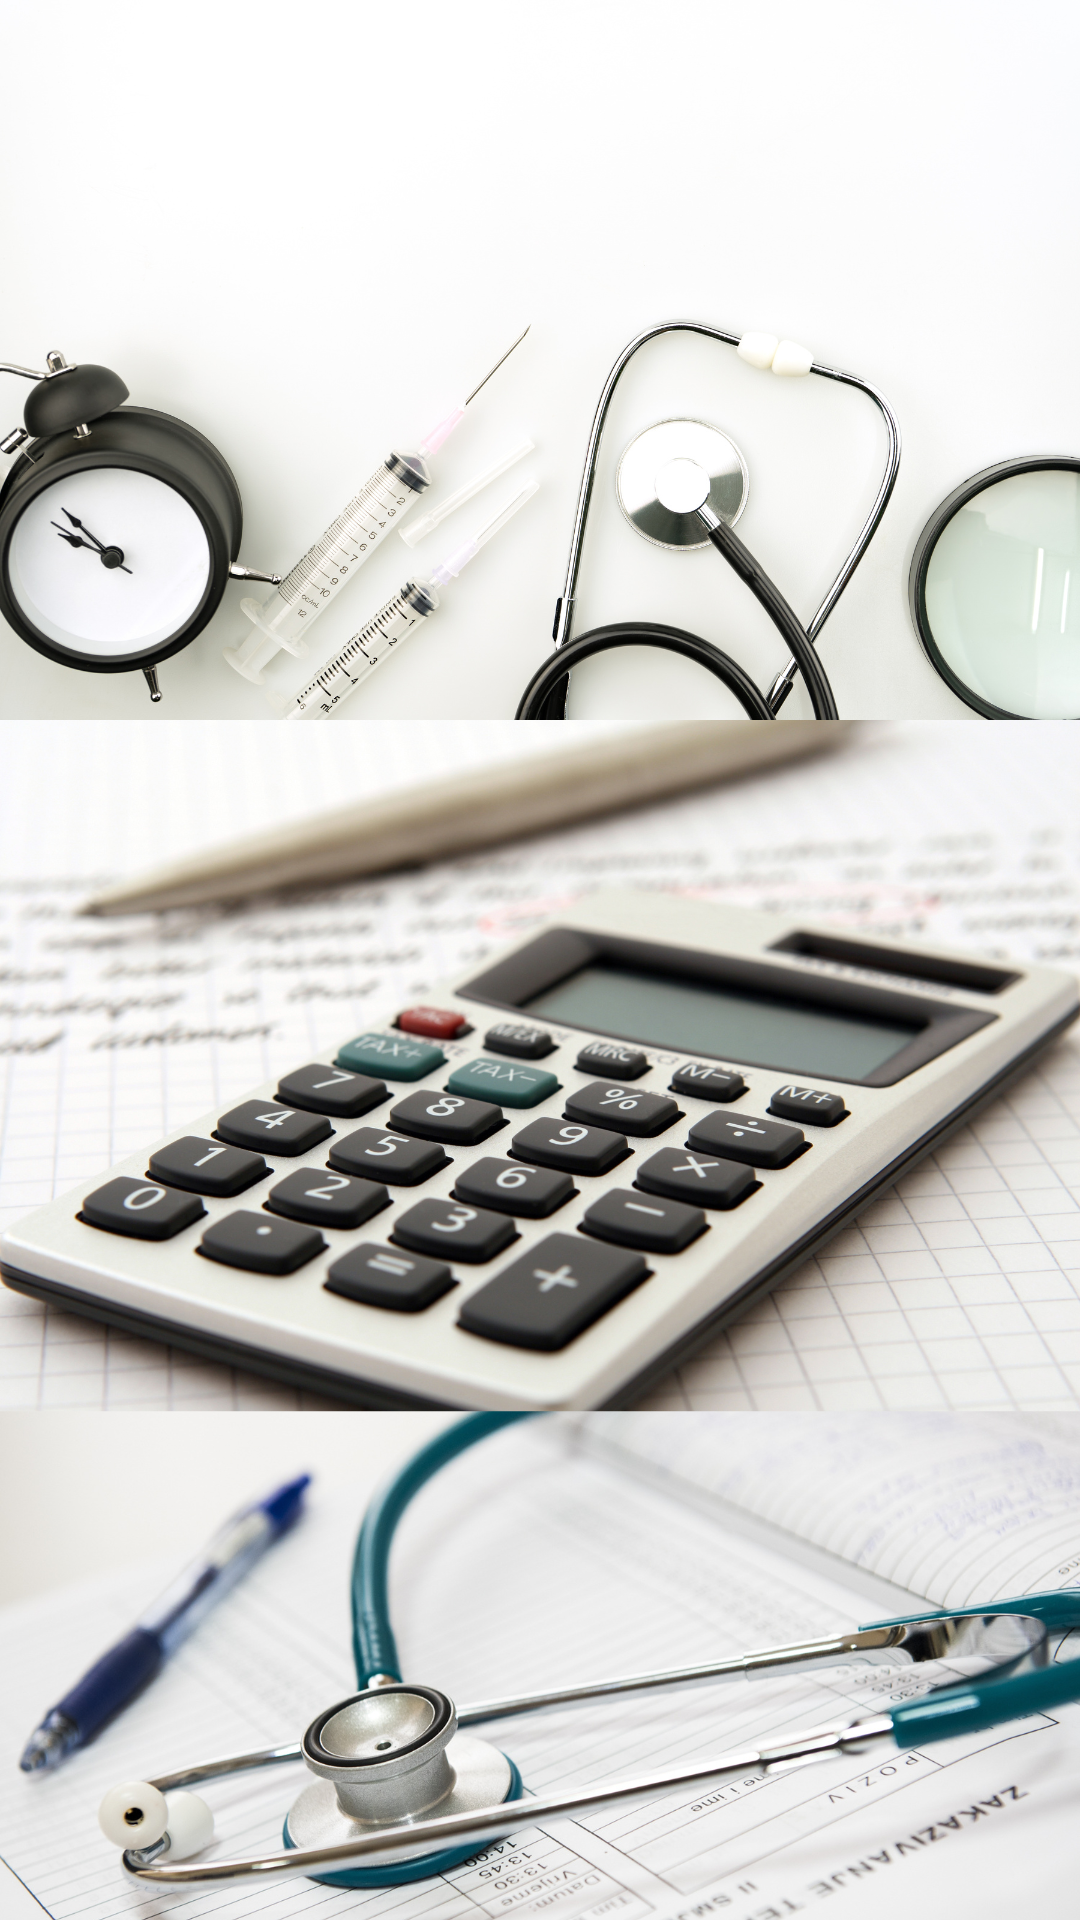

## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read and Load Data

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Missing data check

In [7]:
df.isnull().sum() #no missing data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## EDA

In [8]:
df.shape

(1338, 7)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Visualizations
## First we'll see how the charges are distributed according to given factors

C:\Users\zahed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Charges'}, xlabel='charges', ylabel='Density'>

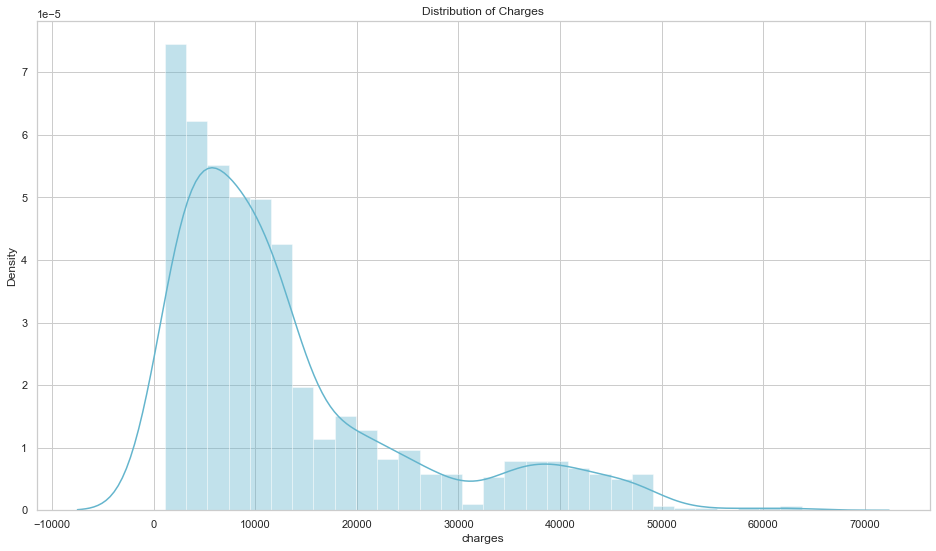

In [28]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,9))
plt.title('Distribution of Charges')
sns.distplot(df['charges'],kde=True,color='c')

The above distribution is right-skewed. To make it closer to normal we can apply natural log

C:\Users\zahed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Charges'}, xlabel='charges', ylabel='Density'>

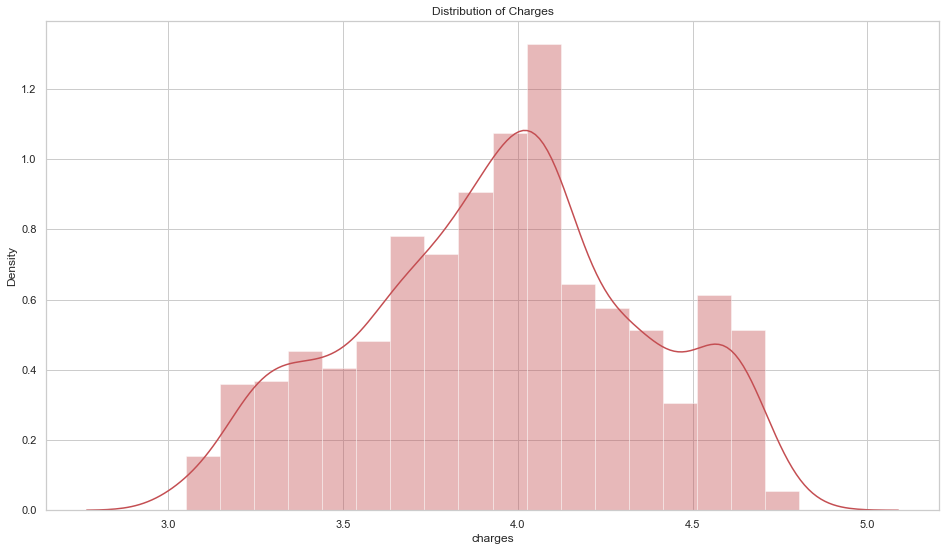

In [35]:
plt.figure(figsize=(16,9))
plt.title('Distribution of Charges')
sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

## Let's look at average the charges by region

<AxesSubplot:title={'center':'Distribution of Average Charges across the regions'}, xlabel='charges', ylabel='region'>

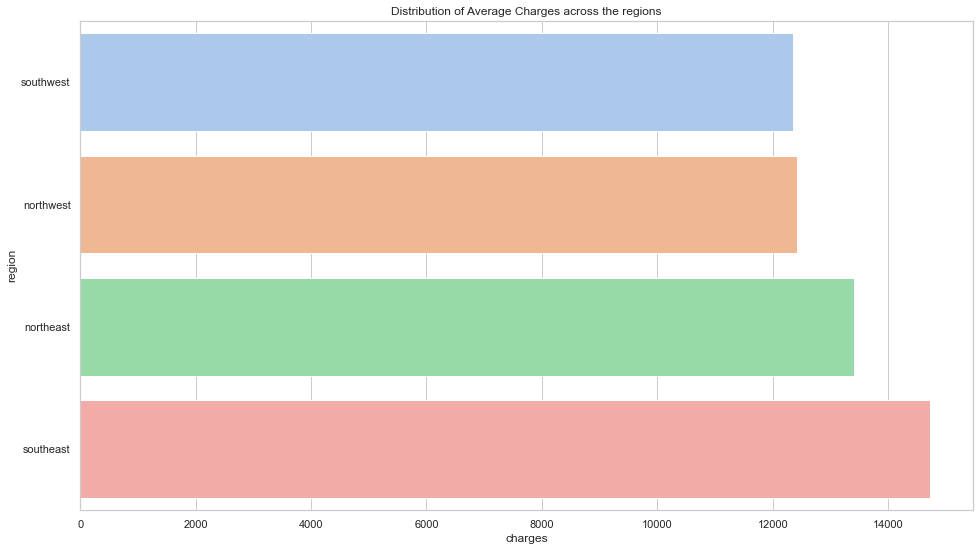

In [40]:
charges = df['charges'].groupby(df['region']).mean().sort_values(ascending = True)
charges
plt.figure(figsize=(16,9))
plt.title('Distribution of Average Charges across the regions')
sns.barplot(x=charges.head(), y=charges.head().index, palette='pastel')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. It makes sense because the sample size taken more from southeast region. (ref: VizualizingInsuranceDataForSmokersVsNonSmokers.ipynb)
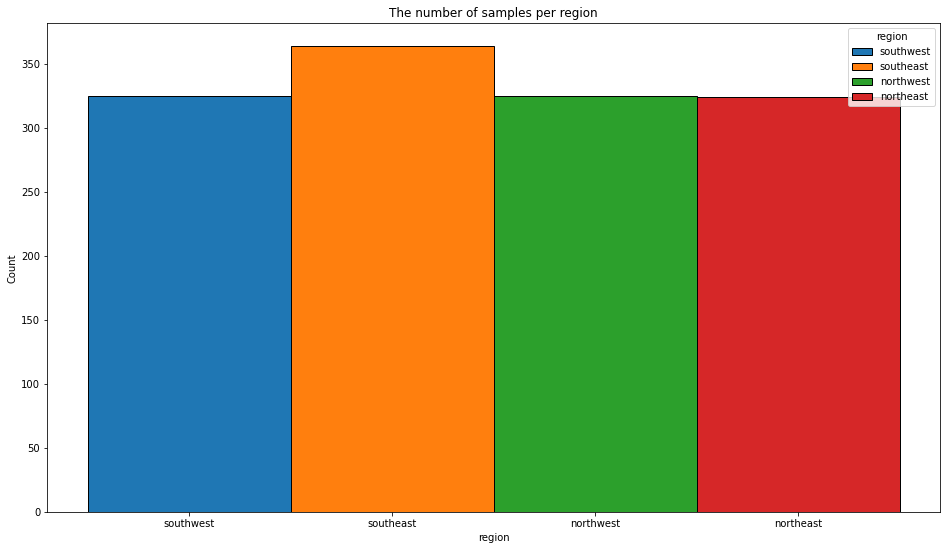

## Let's see how certain factors (sex, smoking, having children) changes by region

<AxesSubplot:title={'center':'Distribution of charges across the regions based on genders'}, xlabel='region', ylabel='charges'>

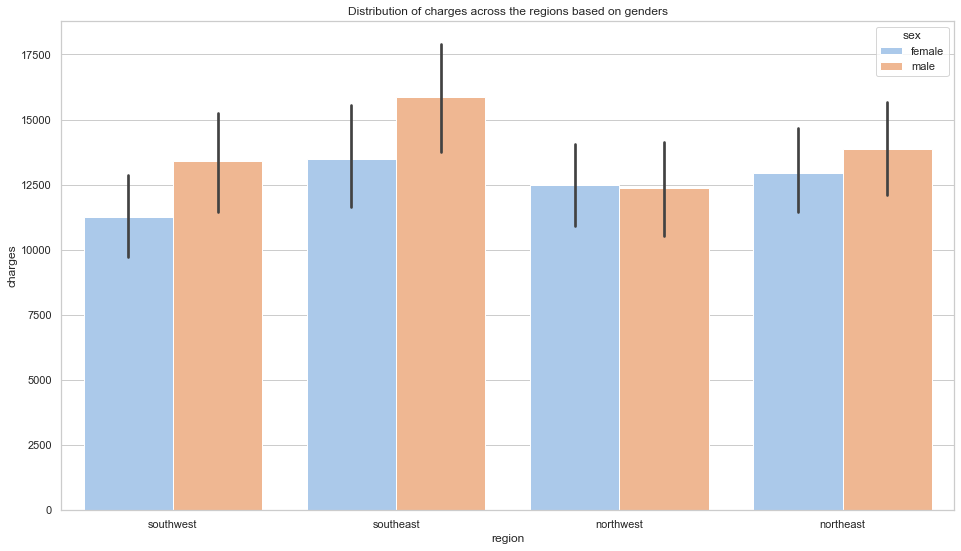

In [38]:
plt.figure(figsize=(16,9))
plt.title('Distribution of charges across the regions based on genders')
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='pastel')

<AxesSubplot:title={'center':'Distribution of charges across the regions based on smoking behavior'}, xlabel='region', ylabel='charges'>

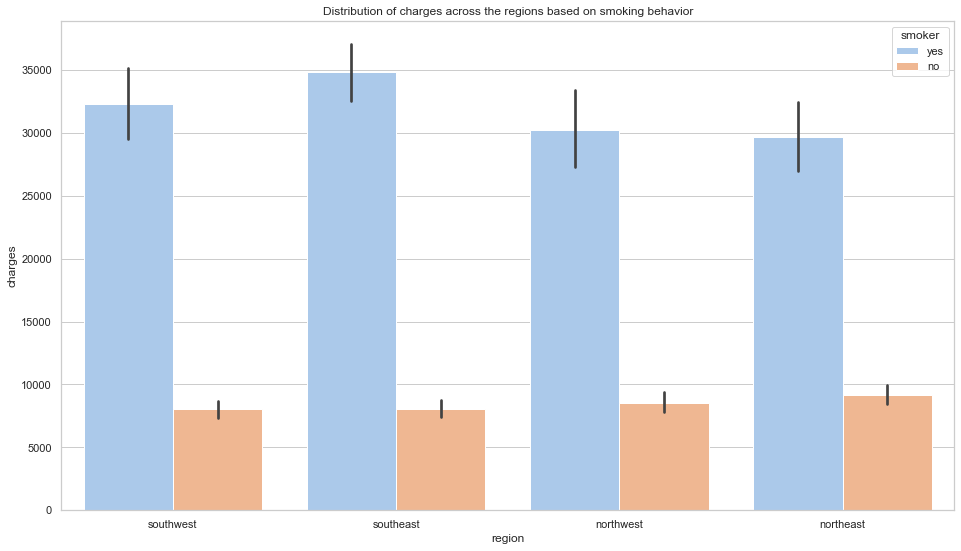

In [41]:
plt.figure(figsize=(16,9))
plt.title('Distribution of charges across the regions based on smoking behavior')
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='pastel')

<AxesSubplot:title={'center':'Distribution of charges across the regions based on having children'}, xlabel='region', ylabel='charges'>

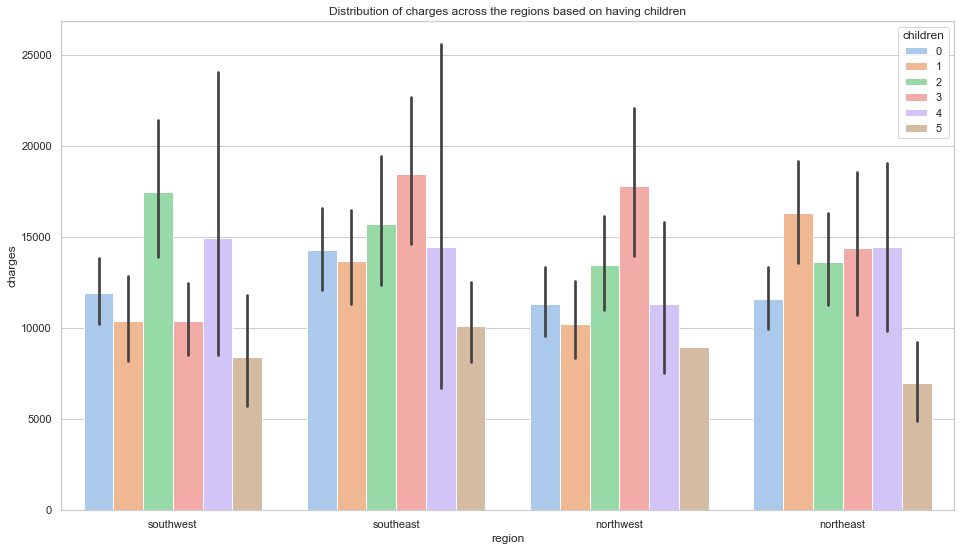

In [42]:
plt.figure(figsize=(16,9))
plt.title('Distribution of charges across the regions based on having children')
sns.barplot(x='region', y='charges', hue='children', data=df, palette='pastel')

Summary: As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

## Now let's analyze the medical charges by age, bmi and children according to the smoking factor

Text(0.5, 1.0, 'Medical charges by children according to the smoking factor')

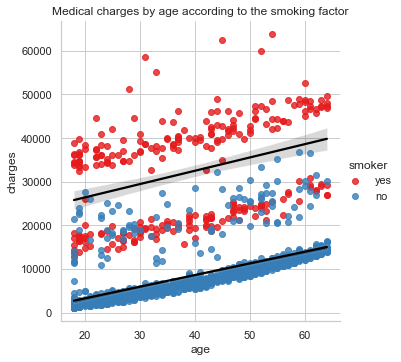

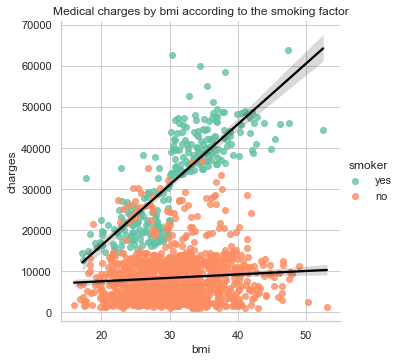

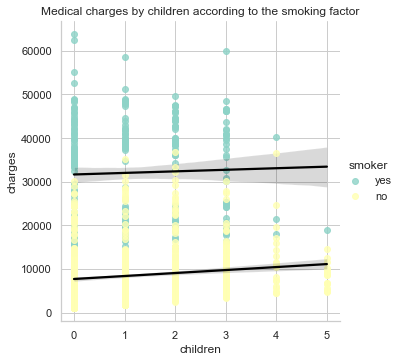

In [53]:
sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', line_kws={'color': 'black'}, palette='Set1')
plt.title('Medical charges by age according to the smoking factor')

sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', line_kws={'color': 'black'}, palette='Set2')
plt.title('Medical charges by bmi according to the smoking factor')

sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', line_kws={'color': 'black'}, palette='Set3')
plt.title('Medical charges by children according to the smoking factor')


Summary: Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. People who have children generally smoke less. 

<AxesSubplot:title={'center':'The effect of having children on smoking habits'}, xlabel='children', ylabel='charges'>

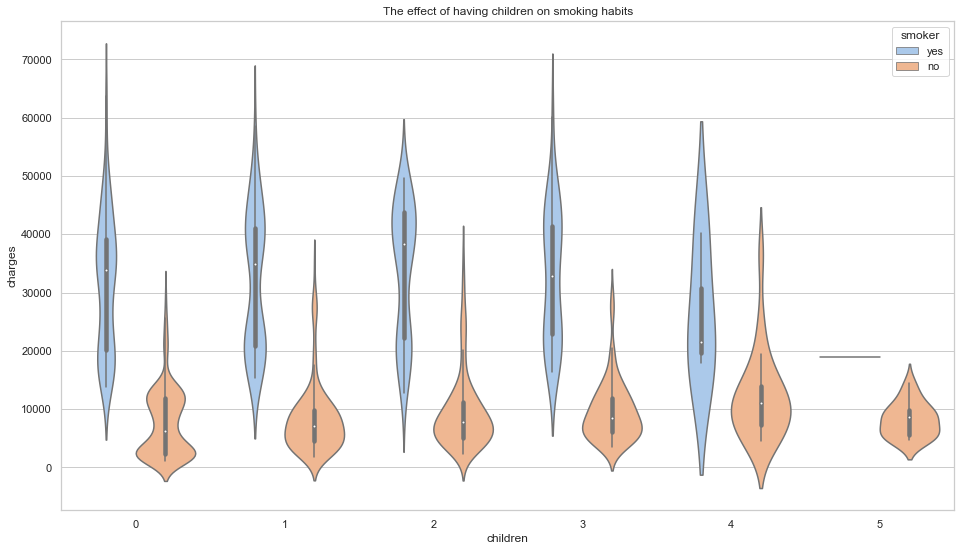

In [57]:
plt.figure(figsize=(16,9))
plt.title('The effect of having children on smoking habits')
sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='pastel')

The people having children smoke less as a result less insurance charge based on smoking.

## Converting objects labels into categorical

In [58]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

## Converting category labels into numerical using LabelEncoder

In [59]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

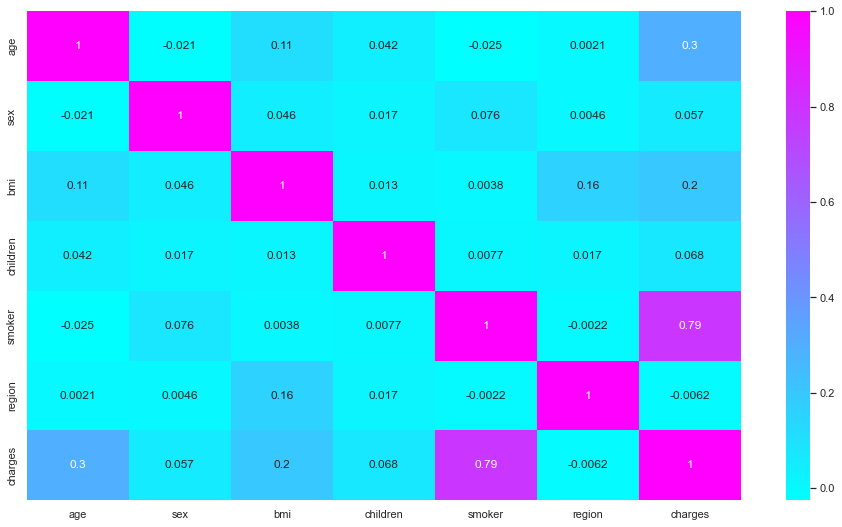

In [61]:
f, ax = plt.subplots(1, 1, figsize=(16, 9))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

Summary : No correlation, except with the smoking.

# Linear Regression Prediction of Medical Insurance Cost
Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [62]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824406
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


The result we got is good enough, but we can try to improve it a bit by reducing unimportant features.

## Ridge Regression
Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.

In [63]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495818
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.799698963206314


## Lasso Regression

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean.Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation.

In [65]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.838929039533
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224705


## Random Forest Regressor
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. When there are large number of features with less data-sets(with low noise), linear regressions may outperform Decision trees/random forests. In general cases, Decision trees will be having better average accuracy. For categorical independent variables, decision trees are better than linear regression.

In [74]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(x_train_pred, y_train),
       metrics.r2_score(x_test_pred, y_test)))

MSE train data: 3628893.887, MSE test data: 19730453.910
R2 train data: 0.972, R2 test data: 0.867


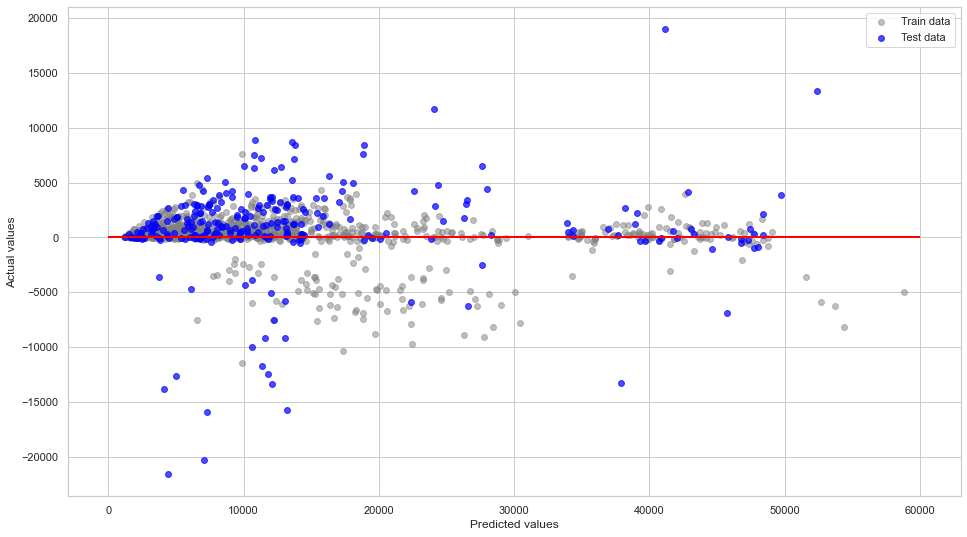

In [76]:
plt.figure(figsize=(16,9))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')


Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

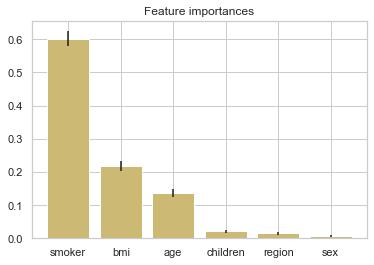

In [77]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

## Polynomial Regression
Polynomial Regression is a form of Linear regression known as a special case of Multiple linear regression which estimates the relationship as an nth degree polynomial. Polynomial Regression is sensitive to outliers so the presence of one or two outliers can also badly affect the performance.

In [78]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.88170525338
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345221


## Evaluating the performance of the algorithm

In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.495045477659
Mean Squared Error: 18895160.09878051
Root Mean Squared Error: 4346.856346692459


## Predicting the charges


In [83]:
y_test_pred = Pol_reg.predict(x_test)


### Comparing the actual output values with the predicted values


In [85]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


Text(0.5, 1.0, 'Actual Vs Predicted Insurance Cost')

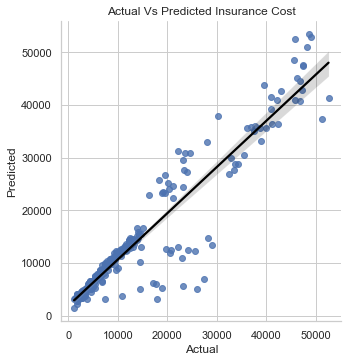

In [95]:

sns.set_style('whitegrid')

sns.lmplot(x ='Actual', y ='Predicted', data = df,line_kws={'color': 'black'})
plt.title('Actual Vs Predicted Insurance Cost')


Conclusion: As we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age. Polynomial Regression turned out to be the best model.